### Retail Industry: Big Sales Mart

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and find out the sales of each product at a particular store.** Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as sfa

In [2]:
train=pd.read_csv("Bigmart_Train.csv")
test=pd.read_csv("Bigmart_Test.csv")

In [3]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat,ItemID_Cat,Outlet_Perf,Existence_Yr
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Perishables,FD,Medium_Perf,14
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Non_Perishables,DR,Medium_Perf,4
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Perishables,FD,Medium_Perf,14
3,19.20,Regular,0.022914,182.0950,Small,Tier 3,Grocery Store,732.3800,Perishables,FD,Low_Perf,15
4,8.93,Non Edible,0.013177,53.8614,High,Tier 3,Supermarket Type1,994.7052,Non_Perishables,NC,High_Perf,26


In [4]:
#encoding in Outlet Size
dicti={'Medium':3,'High':2,'Small':1}
train['Outlet_Size']=train.Outlet_Size.map(dicti)
test['Outlet_Size']=test.Outlet_Size.map(dicti)

In [5]:
dummytrain=pd.get_dummies(train,drop_first=True)
dummytest=pd.get_dummies(test,drop_first=True)

In [6]:
dummytrain

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Existence_Yr,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Cat_Perishables,ItemID_Cat_FD,ItemID_Cat_NC,Outlet_Perf_Low_Perf,Outlet_Perf_Medium_Perf
0,9.300,0.016047,249.8092,3,3735.1380,14,0,0,0,0,1,0,0,1,1,0,0,1
1,5.920,0.019278,48.2692,3,443.4228,4,0,1,0,1,0,1,0,0,0,0,0,1
2,17.500,0.016760,141.6180,3,2097.2700,14,0,0,0,0,1,0,0,1,1,0,0,1
3,19.200,0.022914,182.0950,1,732.3800,15,0,1,0,1,0,0,0,1,1,0,1,0
4,8.930,0.013177,53.8614,2,994.7052,26,1,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2,2778.3834,26,0,0,0,1,1,0,0,0,1,0,0,0
8519,8.380,0.046982,108.1570,3,549.2850,11,0,1,1,0,1,0,0,0,1,0,0,1
8520,10.600,0.035186,85.1224,1,1193.1136,9,1,0,1,0,1,0,0,0,0,1,0,1
8521,7.210,0.145221,103.1332,3,1845.5976,4,0,1,0,1,0,1,0,0,1,0,0,1


In [7]:
#Full model ~Linear Regression

X=dummytrain.drop('Item_Outlet_Sales',axis=1)
y=dummytrain.Item_Outlet_Sales

#Import the linear model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

#fit and predict

pred=lr.fit(X,y).predict(dummytest)
pred

array([1805.78428   , 1624.0027766 , 1875.05188385, ..., 1844.65708823,
       3582.00283103, 1296.69165283])

In [8]:
#cross validation for submission
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,random_state=42,shuffle=True)
lr=LinearRegression()

mylist=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    mylist.append(lr.fit(xtrain,ytrain).predict(dummytest))

### About Cross Validation

* It is a kind of a model which uses multiple samples to learn the pattern from the data and then predicts on the test set.

* Here, the samples drawn are divided in n folds. The data is then bifurcated basis the folds and the learning happens on each and every fold followed by the prediction.

* Cross Validation models are more reliable than a general train test split because it helps cut down the Variance in the Prediction

#### About LOOCV
* Leave One Out Cross Validation is an approach where the model is learning on each row and  predicting on each row. 

* Thus, it is very different from the Cross Validation approach where the KFolds represent K Samples of Data taken to build the Same Model.

* LOOCV can work well with smaller datasets where as It would become Computationally very expensive as each row is used for fitting and predicting.

**Note: As the number of folds increase, overfitting begins. The popular split value is 5, 10, 20, 25, 50...50 is used in the extreme scenarios.**

In [9]:
finalpred=np.abs(pd.DataFrame(mylist).T.mean(axis=1))

In [10]:
#import submission file

submission=pd.read_csv(r"C:\Users\KRITGYA KASHYAP\Downloads\sample_submission_8RXa3c6.csv")

In [11]:
submission['Item_Outlet_Sales']=np.abs(pred)

In [12]:
#Export the submission file
submission.to_csv('LRMODEL_BM.csv',index=False)

In [13]:
cd

C:\Users\KRITGYA KASHYAP


### Cross Validation 

* able to reduce the variance ...

In [14]:
from sklearn.model_selection import KFold
X=dummytrain.drop('Item_Outlet_Sales',axis=1)
y=dummytrain.Item_Outlet_Sales


###### build the model using K Fold Cross Validation

In [15]:
#machine creation (KFold)
meri_x=KFold(n_splits=5,shuffle=True)

#MOdel
from sklearn.linear_model import LinearRegression,SGDRegressor
lr=LinearRegression()
sgd=SGDRegressor()

mylist=[]

for train_index,test_index in meri_x.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    
    xtest=X.loc[test_index]
    ytest=y.loc[test_index]
    
    mylist.append(lr.fit(xtrain,ytrain).predict(xtest))  

In [16]:
finalpred=pd.DataFrame(mylist).T.mean(axis=1)

In [17]:
#checking the meterics

from sklearn.metrics import r2_score,mean_squared_error
print('R2 Score :',r2_score(ytest,finalpred[1:]))
print('RMSE :',np.sqrt(mean_squared_error(ytest,finalpred[1:])))

R2 Score : -0.1234906257377899
RMSE : 1802.9848265643116


### Regularization

In [18]:
lr=LinearRegression()

In [19]:
lr.fit(X,y)

LinearRegression()

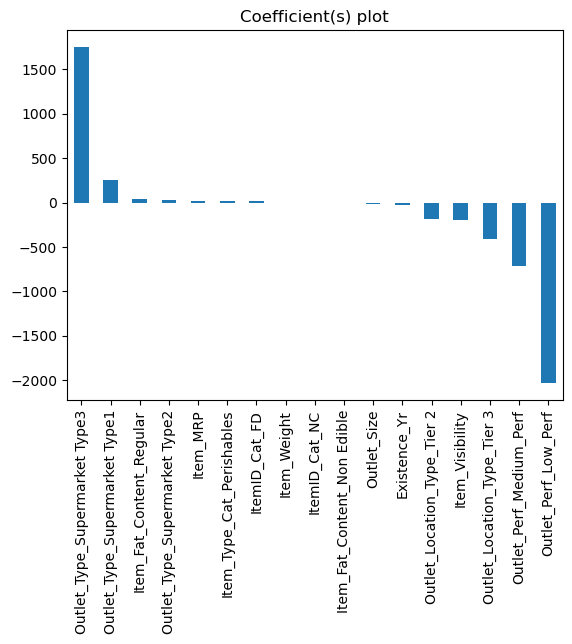

In [20]:
pd.Series(lr.coef_,index=X.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Coefficient(s) plot')
plt.show()

#machine gives weightage to categorical columns,this leads to over fitting ... because machine did not give
#weightage to correct set of features.  

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

rf.fit(X,y)

RandomForestRegressor()

<AxesSubplot:>

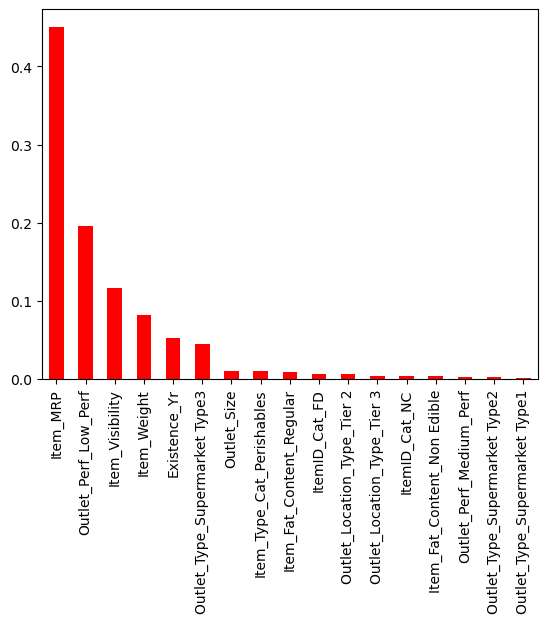

In [22]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',color='red')

In [23]:
kfold=KFold(n_splits=5,random_state=42,shuffle=True)
pred=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))

In [24]:
vals=pd.DataFrame(pred).T.mean(axis=1)
submission['Item_Outlet_Sales']=np.abs(vals)

In [25]:
submission.to_csv('RandomForest_BM.csv',index=False)

In [26]:
cd

C:\Users\KRITGYA KASHYAP
